In [17]:
import numpy
from matplotlib import pyplot
%matplotlib inline

In [18]:
def velocity(rho,u_max,rho_max):
    u = u_max * (1 - rho / rho_max)
    return u

In [19]:
def flux(rho,u_max,rho_max):
    F = rho * velocity(rho, u_max, rho_max)
    return F

In [45]:
def ic(x, x_light,rho_light):
    rho0 = numpy.zeros_like(x)
    mask = numpy.where((x >= 0) & (x < x_light))
    rho0[mask] = rho_light * x[mask] / 2
    return rho0

In [46]:
def ftbs(rho0, nt, dt, dx, u_max, rho_max):
    rho_hist = [rho0.copy()]
    rho = rho0.copy()
    for n in range(nt):
        F = flux(rho, u_max, rho_max)
        rho[1:] = rho[1:] - dt * (F[1:] - F[:-1]) / dx
        rho_hist.append(rho.copy())
    return rho_hist

In [47]:
nx=81
L=4.0
dx=L / (nx - 1)
x = numpy.linspace(0.0, L, num=nx)
nt=30
u_max=1.0
rho_max=10.0
x_light = 2
rho_light = 10

In [48]:
sigma = 1.0
dt = sigma * dx / u_max
rho0 = ic(x, x_light,rho_light)
rho_hist = ftbs(rho0, nt, dt,dx, u_max, rho_max)

In [49]:
def plot(n, x, rho_hist):
    pyplot.figure()
    pyplot.xlabel('Road')
    pyplot.ylabel('Traffic densiry')
    pyplot.plot(x, rho_hist[n])
    pyplot.xlim(x[0],x[-1])
    pyplot.ylim(-0.5,11.0)

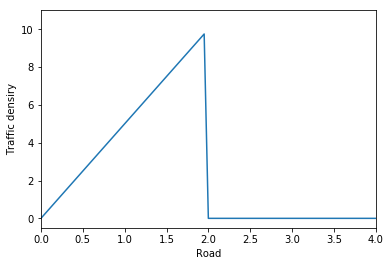

In [50]:
plot(0, x, rho_hist)

In [51]:
import ipywidgets
def interactive_plot(x, rho_hist):
    nt = len(rho_hist) - 1
    nt_slider = ipywidgets.IntSlider(value = 0, min=0, max=nt, step=1, description='Time step')
    w = ipywidgets.interactive(plot, n=nt_slider, x=ipywidgets.fixed(x), rho_hist=ipywidgets.fixed(rho_hist))
    return w

In [52]:
interactive_plot(x, rho_hist)

interactive(children=(IntSlider(value=0, description='Time step', max=30), Output()), _dom_classes=('widget-in…

In [ ]:
def u_wave()